In [551]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

import warnings 
warnings.filterwarnings('ignore')

#SMOTE -> oversampling

In [552]:
df = pd.read_csv(r'C:\Users\win10\Downloads\archive (2)\Automobile_Dataset.csv')

In [553]:
df

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


In [554]:
df.shape

(121856, 40)

In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [556]:
df.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [557]:
df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [558]:
df.dropna(inplace=True)

In [559]:
df.isnull().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_C

In [560]:
df.nunique()

ID                            2568
Client_Income                  191
Car_Owned                        1
Bike_Owned                       2
Active_Loan                      2
House_Own                        2
Child_Count                      5
Credit_Amount                 1053
Loan_Annuity                  1774
Accompany_Client                 6
Client_Income_Type               3
Client_Education                 5
Client_Marital_Status            4
Client_Gender                    2
Loan_Contract_Type               2
Client_Housing_Type              6
Population_Region_Relative     152
Age_Days                      2250
Employed_Days                 1962
Registration_Days             2209
ID_Days                       1997
Own_House_Age                   43
Mobile_Tag                       1
Homephone_Tag                    2
Workphone_Working                2
Client_Occupation               18
Client_Family_Members            6
Cleint_City_Rating               3
Application_Process_

In [561]:
df.drop(columns = ['ID', 'ID_Days'], inplace=True)

In [562]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
print(numerical_columns.columns)

Index(['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count',
       'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1',
       'Score_Source_2', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')


In [563]:
object_columns = df.select_dtypes(include=['object'])
print(object_columns.columns)

Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'Client_Occupation', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_3'],
      dtype='object')


In [564]:
df.select_dtypes(include=['int64', 'float64']).nunique()

Car_Owned                      1
Bike_Owned                     2
Active_Loan                    2
House_Own                      2
Child_Count                    5
Own_House_Age                 43
Mobile_Tag                     1
Homephone_Tag                  2
Workphone_Working              2
Client_Family_Members          6
Cleint_City_Rating             3
Application_Process_Day        7
Application_Process_Hour      22
Score_Source_1              2436
Score_Source_2              2399
Social_Circle_Default        568
Phone_Change                1485
Credit_Bureau                 10
Default                        2
dtype: int64

In [565]:
df.nunique()

Client_Income                  191
Car_Owned                        1
Bike_Owned                       2
Active_Loan                      2
House_Own                        2
Child_Count                      5
Credit_Amount                 1053
Loan_Annuity                  1774
Accompany_Client                 6
Client_Income_Type               3
Client_Education                 5
Client_Marital_Status            4
Client_Gender                    2
Loan_Contract_Type               2
Client_Housing_Type              6
Population_Region_Relative     152
Age_Days                      2250
Employed_Days                 1962
Registration_Days             2209
Own_House_Age                   43
Mobile_Tag                       1
Homephone_Tag                    2
Workphone_Working                2
Client_Occupation               18
Client_Family_Members            6
Cleint_City_Rating               3
Application_Process_Day          7
Application_Process_Hour        22
Client_Permanent_Mat

In [566]:
df.drop_duplicates(inplace = True)

In [567]:
df.Default.value_counts()

Default
0    2373
1     161
Name: count, dtype: int64

In [568]:
df.shape

(2534, 38)

In [569]:
df.describe()

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,2534.0,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.0,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,1.0,0.329519,0.492107,0.681926,0.607735,11.228887,1.0,0.206788,0.308208,2.402526,1.918311,3.189424,12.400947,0.496933,0.556888,0.125720,1075.685083,1.758879,0.063536
std,0.0,0.470131,0.500036,0.465820,0.781267,12.677936,0.0,0.405082,0.461844,0.949874,0.531700,1.785041,3.345875,0.202725,0.171870,0.119114,864.598202,1.780678,0.243973
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.019191,0.000634,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,4.000000,1.0,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.335083,0.469754,0.061900,353.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,1.000000,0.000000,8.000000,1.0,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.500414,0.604719,0.092800,910.000000,1.000000,0.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,14.000000,1.0,0.000000,1.000000,3.000000,2.000000,5.000000,15.000000,0.659174,0.684298,0.152600,1700.750000,3.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,4.000000,65.000000,1.0,1.000000,1.000000,6.000000,3.000000,6.000000,21.000000,0.931347,0.809443,1.000000,3949.000000,9.000000,1.000000


In [570]:
Q3=np.percentile(df.describe(),75)
Q1=np.percentile(df.describe(),25)
Q2=np.percentile(df.describe(),50)


IQR=Q3-Q1
print('Q2:',Q2)
print('Q3:',Q3)
print('Q1:',Q1)
print('IQR:',IQR)

Q2: 1.0
Q3: 5.25
Q1: 0.14588005130228887
IQR: 5.104119948697711


In [571]:
from scipy import stats
skew=stats.skew(df.describe())
print('skewness:',skew)

skewness: [2.26778615 2.26778586 2.26778586 2.26778585 2.26777703 2.26543877
 2.26778615 2.26778616 2.26778586 2.26777256 2.26778375 2.26776701
 2.26754419 2.2677864  2.26778644 2.26778626 0.93866595 2.26773984
 2.26778618]


In [572]:
log_transformed_data = np.log(skew)

In [573]:
print('skewness:',log_transformed_data)

skewness: [ 0.81880409  0.81880396  0.81880396  0.81880396  0.81880007  0.81776846
  0.81880409  0.8188041   0.81880396  0.8187981   0.81880303  0.81879565
  0.81869739  0.8188042   0.81880422  0.81880414 -0.06329561  0.81878367
  0.8188041 ]


In [574]:
corre=stats.spearmanr(df.describe())

In [575]:
corre

SignificanceResult(statistic=array([[1.        , 0.33752637, 0.33752637, 0.56254395, 0.3354102 ,
        0.32732684, 1.        , 0.23249528, 0.33752637, 0.76834982,
        0.78262379, 0.65465367, 0.65465367, 0.65465367, 0.65465367,
        0.43643578, 0.43643578, 0.32929278, 0.23249528],
       [0.33752637, 1.        , 1.        , 0.73417722, 0.99373035,
        0.96978152, 0.33752637, 0.75203567, 1.        , 0.7286172 ,
        0.52831234, 0.7979215 , 0.7979215 , 0.74881864, 0.74881864,
        0.94523009, 0.83474865, 0.97560608, 0.75203567],
       [0.33752637, 1.        , 1.        , 0.73417722, 0.99373035,
        0.96978152, 0.33752637, 0.75203567, 1.        , 0.7286172 ,
        0.52831234, 0.7979215 , 0.7979215 , 0.74881864, 0.74881864,
        0.94523009, 0.83474865, 0.97560608, 0.75203567],
       [0.56254395, 0.73417722, 0.73417722, 1.        , 0.72957418,
        0.82247293, 0.56254395, 0.51007637, 0.73417722, 0.79653914,
        0.74215304, 0.88385151, 0.88385151, 0.932954

In [576]:
corre  = df.describe().values.reshape((2, -1))

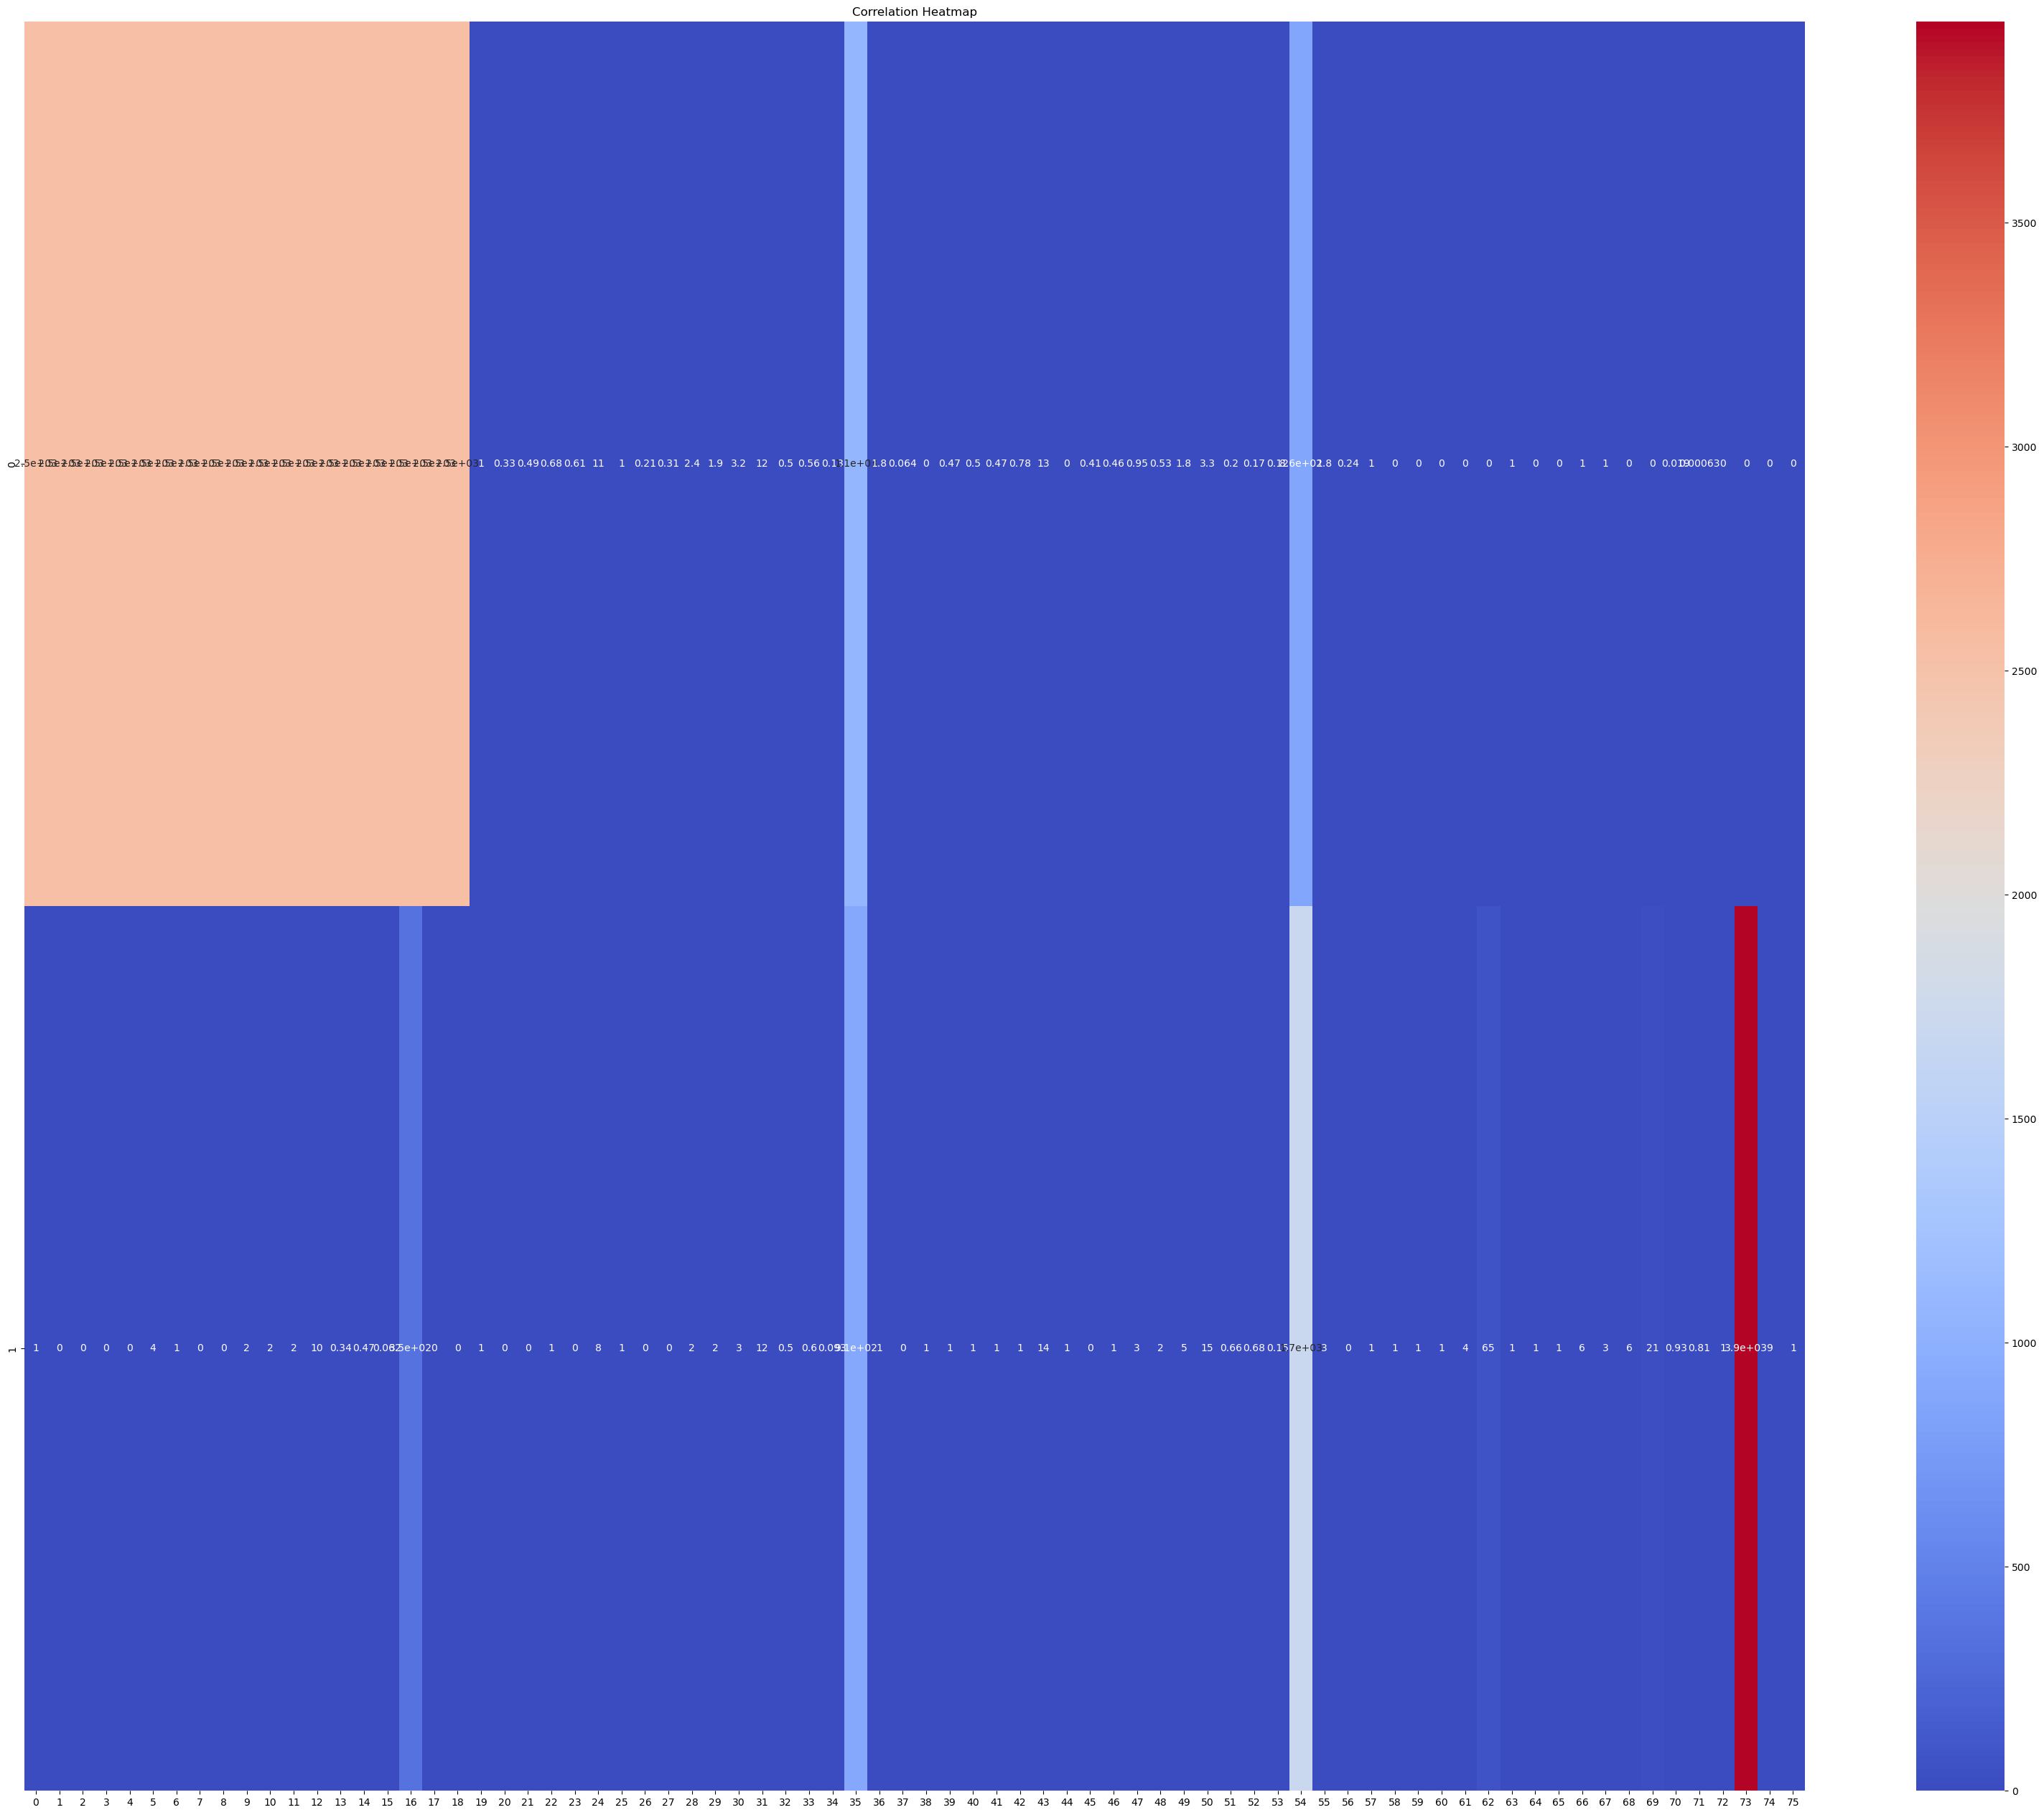

In [577]:
# Set up the matplotlib figure
plt.figure(figsize=(40,32))

# Plot the heatmap
sns.heatmap(corre,annot=True,cmap="coolwarm") 

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [578]:
df_subset=df[['Client_Gender','Client_Occupation','Default']]

In [579]:
%matplotlib inline

Text(0.5, 1.0, "Histogram with pdf for feature 'Default'")

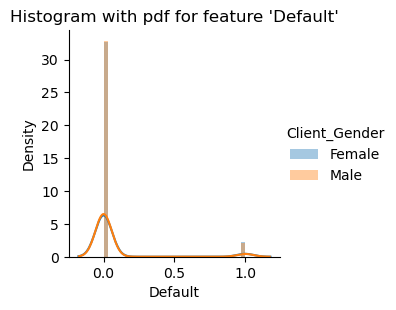

In [580]:
sns.FacetGrid(df_subset,hue='Client_Gender').map(sns.distplot,'Default').add_legend()
plt.title("Histogram with pdf for feature 'Default'")

<Axes: xlabel='Default', ylabel='Client_Occupation'>

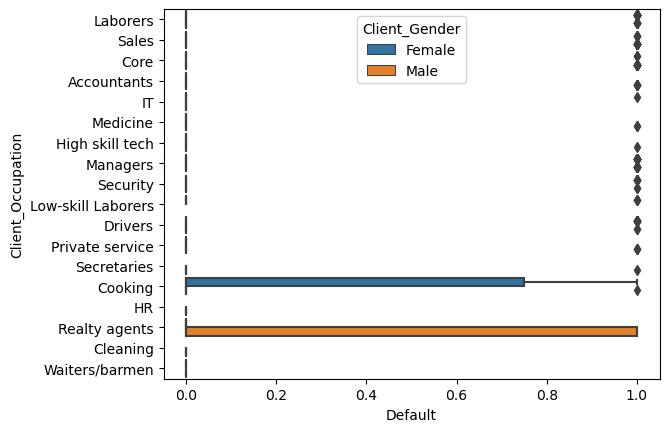

In [581]:
sns.boxplot(data=df_subset,x='Default', y='Client_Occupation',hue='Client_Gender')

<Axes: xlabel='Default', ylabel='Client_Occupation'>

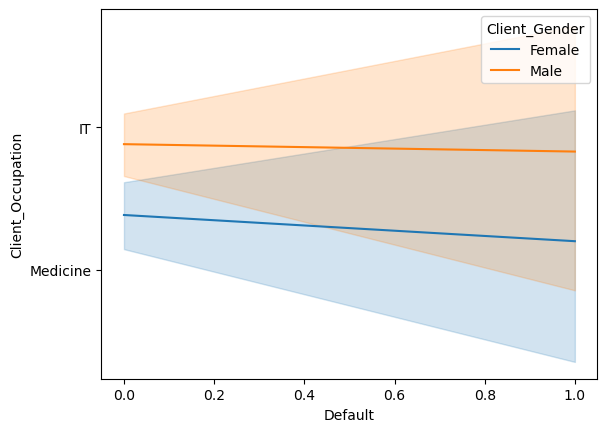

In [582]:
sns.lineplot(data=df_subset,x='Default', y='Client_Occupation',hue='Client_Gender')

<Axes: xlabel='Default', ylabel='Client_Occupation'>

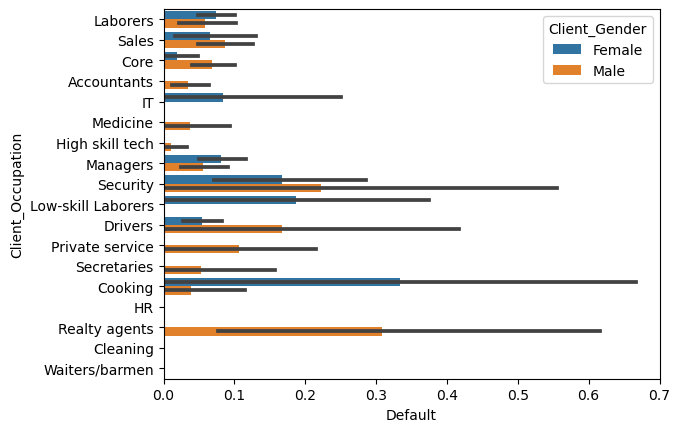

In [583]:
sns.barplot(data=df_subset,x='Default', y='Client_Occupation',hue='Client_Gender',width=0.8)

<Axes: xlabel='Default', ylabel='Client_Occupation'>

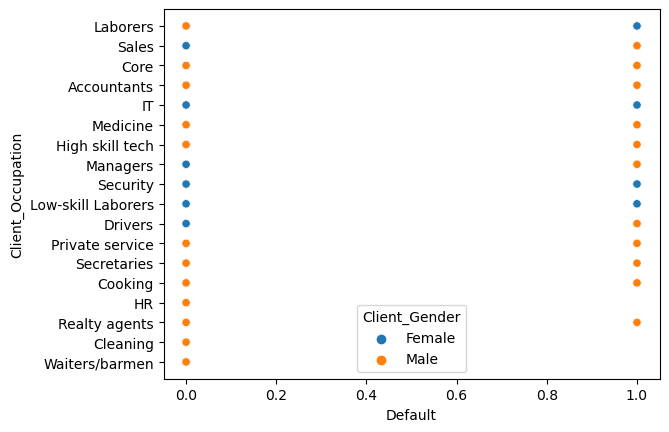

In [584]:
sns.scatterplot(data=df_subset,x='Default', y='Client_Occupation',hue='Client_Gender')

<Axes: xlabel='Default', ylabel='Client_Occupation'>

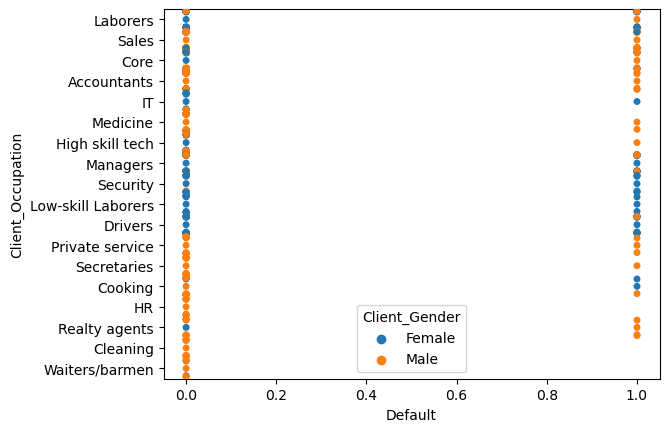

In [585]:
sns.swarmplot(x='Default', y='Client_Occupation',hue='Client_Gender',data=df)

<Axes: xlabel='Default', ylabel='Client_Occupation'>

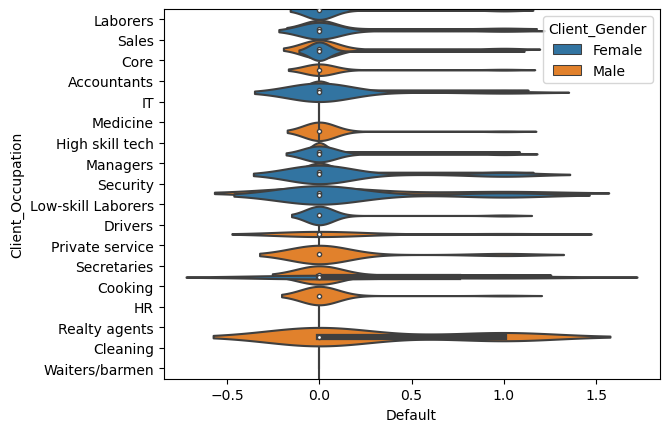

In [586]:
sns.violinplot(x='Default', y='Client_Occupation',hue='Client_Gender',data=df,width=1.8)

# Developing Model

In [587]:
ca = ['Type_Organization','Accompany_Client','Client_Income_Type','Application_Process_Day','Application_Process_Hour','Client_Education','Phone_Change','Client_Permanent_Match_Tag','Client_Contact_Work_Tag','Client_Gender','Client_Housing_Type','Mobile_Tag','Homephone_Tag','Workphone_Working','Client_Occupation']

In [588]:
df.drop(ca,inplace=True,axis=1)

In [589]:
df.shape

(2534, 23)

In [590]:
df.select_dtypes(include='object')

,Client_Income,Credit_Amount,Loan_Annuity,Client_Marital_Status,Loan_Contract_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,Score_Source_3
102,27000,53366.85,4003.2,M,CL,0.032561,12323,1117,5420,0.581484
126,18000,27000,724.95,D,CL,0.026392,14559,4911,2244,0.397946
161,18000,48149.55,3351.15,M,CL,0.00702,9114,646,9087,0.236611
189,15750,57340.8,2072.7,M,CL,0.010556,10977,639,5588,0.684828
190,18000,27370.8,3095.55,M,CL,0.010032,8675,1232,126,0.554947
...,...,...,...,...,...,...,...,...,...,...
121684,9000,32590.8,1663.65,M,CL,0.018801,10192.0,2551.0,3092.0,0.681706
121771,16650,51244.65,3741.75,M,CL,0.00702,14674.0,2196.0,8816.0,0.759712
121777,9900,76022.55,3028.05,M,CL,0.031329,11797.0,381.0,5462.0,0.770087
121838,31500,94230,2767.95,M,CL,0.019101,15686.0,8412.0,4598.0,0.450747


In [591]:
ca1=['Client_Marital_Status','Loan_Contract_Type']

In [592]:
df.drop(ca1,inplace=True,axis=1)

In [593]:
df.shape

(2534, 21)

In [594]:
y=df['Default']
x=df.drop(['Default'], axis=1)

In [595]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=88)

# Logistic Regression

In [596]:
sm = SMOTE(random_state = 2) 
x_train1, y_train1 = sm.fit_resample(x_train, y_train.ravel())

In [597]:
print('After OverSampling, the shape of train_X: {}'.format(x_train1.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train1.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train1 == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train1 == 0)))

After OverSampling, the shape of train_X: (3786, 20)
After OverSampling, the shape of train_y: (3786,) 

After OverSampling, counts of label '1': 1893
After OverSampling, counts of label '0': 1893


In [598]:
log=LogisticRegression()

log.fit(x_train1,y_train1)

print(f"Training score : {log.score(x_train1,y_train1)}")
print(f"Testing score : {log.score(x_test,y_test)}")

Training score : 0.5969360802958267
Testing score : 0.6410256410256411


In [599]:
y_pred=log.predict(x_test)

In [600]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6410256410256411


In [601]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.97      0.64      0.77       480
           1       0.10      0.70      0.17        27

    accuracy                           0.64       507
   macro avg       0.54      0.67      0.47       507
weighted avg       0.93      0.64      0.74       507



# Confusion Matrix

In [602]:
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrixs:',cm )

confusion matrixs: [[306 174]
 [  8  19]]


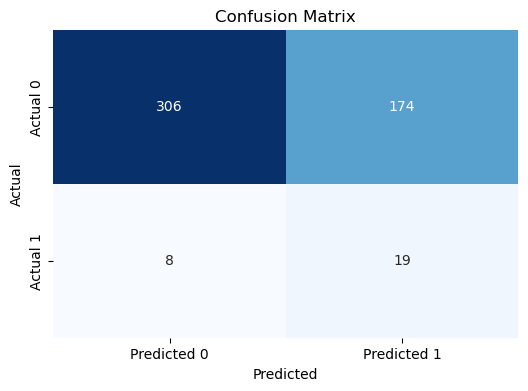

In [603]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC 

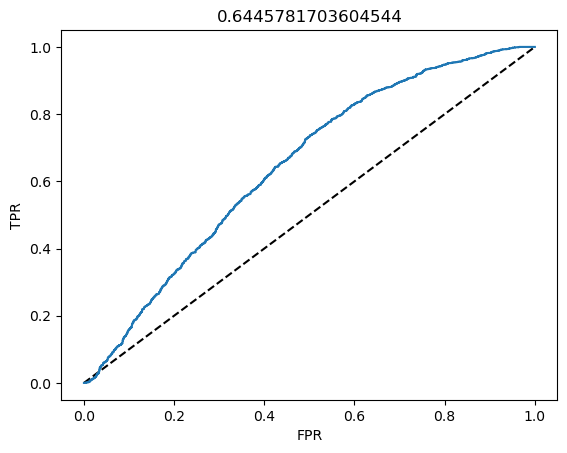

In [604]:
probab=log.predict_proba(x_train1)[:,1]

fpr,tpr,threshold=metrics.roc_curve(y_train1,probab)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(metrics.roc_auc_score(y_train1,probab))
plt.show()

# GridSearch Tuning

In [605]:
param_grid={
    'penalty':['l1','l2'],
    'C':[0.1,0.5,1,5,10]
}

In [606]:
grid_search= GridSearchCV(estimator=log, param_grid=param_grid,cv=5)

In [607]:
grid_search.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [608]:
best_param=grid_search.best_params_
best_model=grid_search.best_estimator_

In [609]:
y_pred=best_model.predict(x_test)

In [610]:
acc=metrics.accuracy_score(y_test,y_pred)
print('ACC:',acc)

ACC: 0.6410256410256411


In [611]:
roc_au=metrics.roc_auc_score(y_test,y_pred)
print('ROC AU:',roc_au)

ROC AU: 0.6706018518518518


In [612]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.97      0.64      0.77       480
           1       0.10      0.70      0.17        27

    accuracy                           0.64       507
   macro avg       0.54      0.67      0.47       507
weighted avg       0.93      0.64      0.74       507



In [613]:
print('Best Parameter:', grid_search.best_params_)

Best Parameter: {'C': 0.1, 'penalty': 'l2'}


In [614]:
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrixs:',cm )

confusion matrixs: [[306 174]
 [  8  19]]


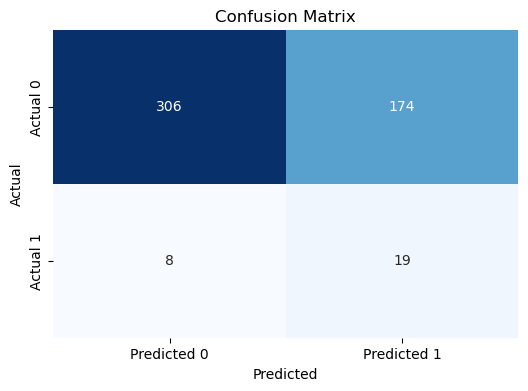

In [615]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tuning

In [616]:
log=LogisticRegression()

log.fit(x_train1,y_train1)

print(f"Training score : {log.score(x_train1,y_train1)}")
print(f"Testing score : {log.score(x_test,y_test)}")

Training score : 0.5969360802958267
Testing score : 0.6410256410256411


In [617]:
y_pred=log.predict(x_test)

In [618]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6410256410256411


In [619]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.97      0.64      0.77       480
           1       0.10      0.70      0.17        27

    accuracy                           0.64       507
   macro avg       0.54      0.67      0.47       507
weighted avg       0.93      0.64      0.74       507



In [620]:
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrixs:',cm)

confusion matrixs: [[306 174]
 [  8  19]]


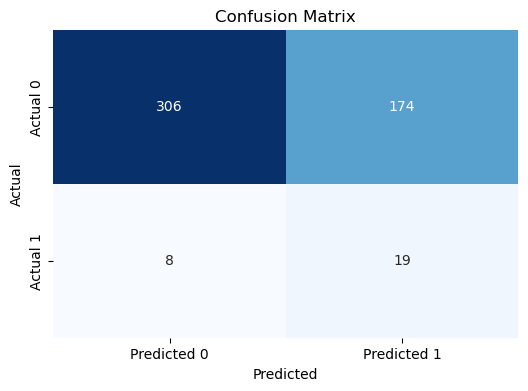

In [621]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# PRC

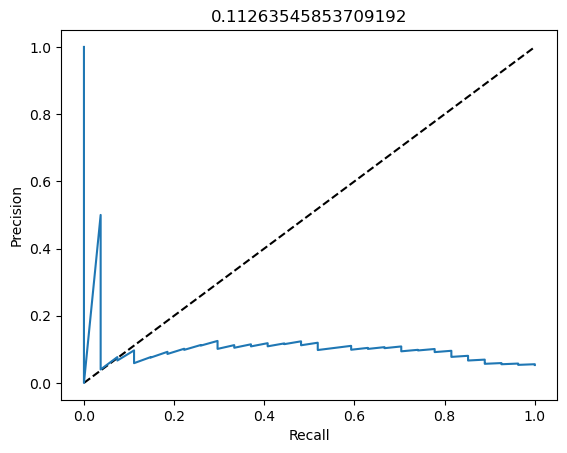

In [622]:
probab=log.predict_proba(x_test)[:,1]

precision,recall,threshold=metrics.precision_recall_curve(y_test,probab)

plt.plot([0,1],[0,1],'k--')
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(metrics.average_precision_score(y_test,probab))
plt.show()

# Randomized tuning

In [623]:
param_dist = {
    'penalty':['l1','l2'],
    'C':[0.1,0.5,1,5,10]
}

In [624]:
random_search= RandomizedSearchCV(log, param_distributions=param_dist, cv=5)

In [625]:
random_search.fit(x_train1,y_train1)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.5, 1, 5, 10],
                                        'penalty': ['l1', 'l2']})

In [626]:
best_param=grid_search.best_params_
best_model=grid_search.best_estimator_

In [627]:
y_pred=best_model.predict(x_test)

In [628]:
acc=metrics.accuracy_score(y_test,y_pred)
print('ACC:',acc)

ACC: 0.6410256410256411


In [629]:
prc_au=metrics.average_precision_score(y_test,y_pred)
print('PRC AU:',prc_au)

PRC AU: 0.08505562311859642


In [630]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.97      0.64      0.77       480
           1       0.10      0.70      0.17        27

    accuracy                           0.64       507
   macro avg       0.54      0.67      0.47       507
weighted avg       0.93      0.64      0.74       507



In [631]:
print('Best Parameter:', grid_search.best_params_)

Best Parameter: {'C': 0.1, 'penalty': 'l2'}


In [632]:
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrixs:',cm)

confusion matrixs: [[306 174]
 [  8  19]]


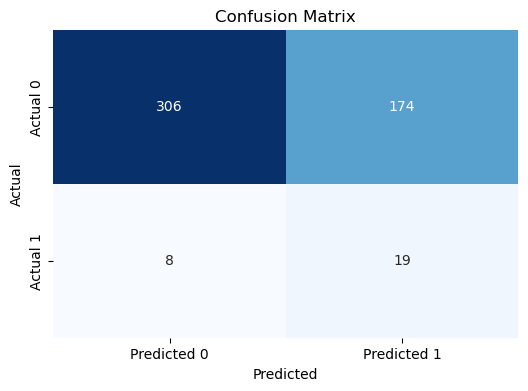

In [633]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [634]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,precision_score

In [635]:
sc= StandardScaler()

In [636]:
x_train=sc.fit_transform(x_train1)
x_test=sc.fit_transform(x_test)

In [637]:
from sklearn.svm import SVC

In [638]:
svcm=SVC(kernel='linear')

In [639]:
svcm.fit(x_train,y_train1)

SVC(kernel='linear')

In [640]:
y_pred=svcm.predict(x_test)

In [641]:
acc=accuracy_score(y_test,y_pred)
print('Accuracy score:', acc)

Accuracy score: 0.571992110453649


In [642]:
print('Accuracy score: {:.2f}%'.format(acc*100))

Accuracy score: 57.20%


In [643]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.55      0.71       480
           1       0.10      0.93      0.19        27

    accuracy                           0.57       507
   macro avg       0.55      0.74      0.45       507
weighted avg       0.95      0.57      0.68       507



In [644]:
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrixs:',cm )

confusion matrixs: [[265 215]
 [  2  25]]


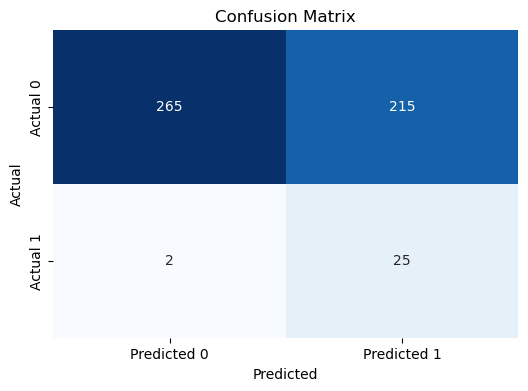

In [645]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Naive bayes

In [646]:
from sklearn.naive_bayes import GaussianNB

In [647]:
classifier=GaussianNB()

In [648]:
classifier.fit(x_train,y_train1)

print(f"Training score : {classifier.score(x_train,y_train1)}")
print(f"Testing score : {classifier.score(x_test,y_test)}")

Training score : 0.7303222398309561
Testing score : 0.47534516765285995


In [649]:
y_pred=classifier.predict(x_test)

In [650]:
acc=accuracy_score(y_test,y_pred)
print('Accuracy score:', acc)

Accuracy score: 0.47534516765285995


In [651]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.47534516765285995


In [652]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.98      0.45      0.62       480
           1       0.08      0.85      0.15        27

    accuracy                           0.48       507
   macro avg       0.53      0.65      0.38       507
weighted avg       0.93      0.48      0.60       507



In [653]:
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrixs:',cm )

confusion matrixs: [[218 262]
 [  4  23]]


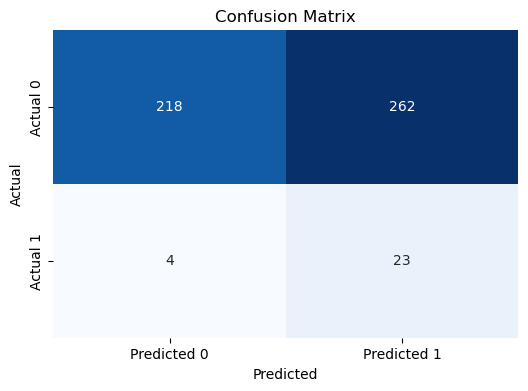

In [654]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [655]:
from sklearn.neighbors import KNeighborsClassifier

In [656]:
k=3
knn_model=KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train,y_train1)

KNeighborsClassifier(n_neighbors=3)

In [657]:
print(f"Training score : {knn_model.score(x_train,y_train1)}")
print(f"Testing score : {knn_model.score(x_test,y_test)}")

Training score : 0.933174854727945
Testing score : 0.6449704142011834


In [658]:
y_pred=classifier.predict(x_test)

In [659]:
acc=accuracy_score(y_test,y_pred)
print('Accuracy score:', acc)

Accuracy score: 0.47534516765285995


In [660]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.98      0.45      0.62       480
           1       0.08      0.85      0.15        27

    accuracy                           0.48       507
   macro avg       0.53      0.65      0.38       507
weighted avg       0.93      0.48      0.60       507



In [661]:
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrixs:',cm )

confusion matrixs: [[218 262]
 [  4  23]]


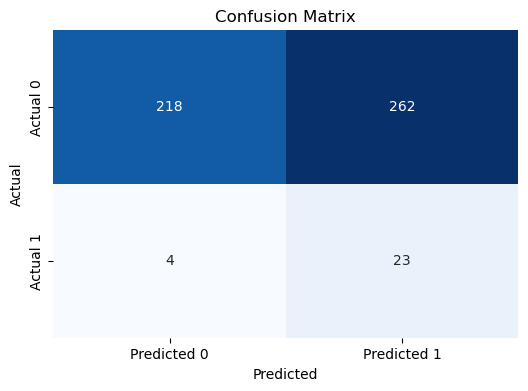

In [662]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [663]:
#LOR =Accuracy: 0.6410256410256411
#GRID SERACH TUNING:-ACC: 0.6410256410256411
#RANDOM SEARCH TUNING:-ACC: 0.6410256410256411
#SVM=Accuracy score: 0.571992110453649
#Naive bayes=Accuracy score: 0.47534516765285995
#KNN=Accuracy score: 0.47534516765285995